In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


# 모듈 임포팅

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [3]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

# 데이터 준비


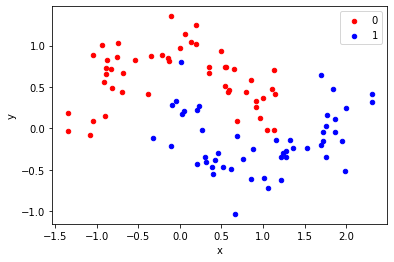

In [4]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

split_index = 30
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


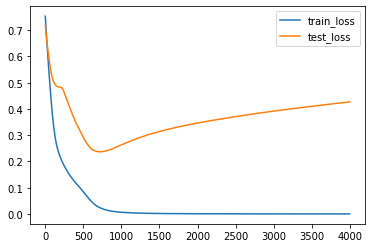

In [5]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


# Overfitting 처리

- DropOut
- BatchNormalization
- Regularization

 # DropOut

In [6]:
from tensorflow.keras.layers import Dropout

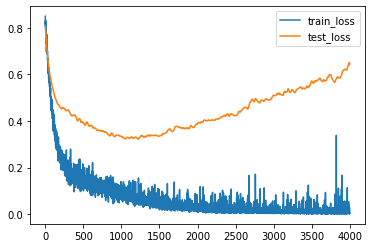

In [7]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()

# BatchNormalization

In [8]:
from tensorflow.keras.layers import BatchNormalization

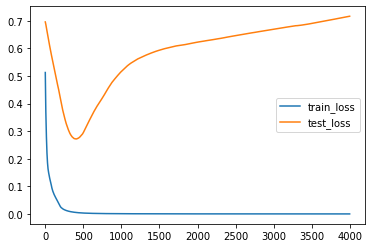

In [9]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()

# Regularization

Dense() 생성시에 kernel_regularization, bias_regularization으로 설정한다.

- l1()
- l1_l2()
- l2()

In [10]:
from tensorflow.keras.regularizers import l1, l2

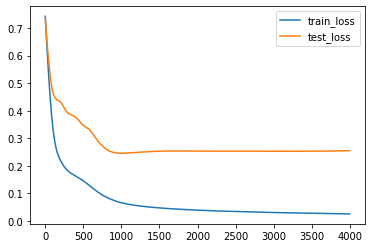

In [11]:
model = Sequential()
# model.add(Dense(20, input_shape=(2,), activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(20, input_shape=(2,), activation='relu', kernel_regularizer=l2(0.001) ))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()